# MBD Project - Stack Overflow - Tags cluster using K-means algorithm

This notebook perform K-means clustering for tags. Tags corpus contains 69111608 tags extracted from questions.

- Input: tags_corpus parquet table
- Algorithm: kmeans
- 20 clusters

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.cluster import KMeans

In [3]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [4]:
tags_corpus = pd.read_parquet('tags_corpus.parquet')

In [5]:
tags_corpus.head()

,Tag
0,ax
1,ax
2,nonlinear-functions
3,nonlinear-functions
4,nonlinear-functions


# K-mean clustering tags
FYI: https://stackoverflow.com/questions/70301061/python-kmeans-print-absolute-frequency-of-words-in-each-cluster

In [6]:
words = tags_corpus['Tag'].to_list()

In [7]:
len(words)

69111608

In [8]:
#tfidf
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(words)

In [9]:
X

<69111608x39419 sparse matrix of type '<class 'numpy.float64'>'
	with 85305381 stored elements in Compressed Sparse Row format>

In [10]:
print(X)

  (0, 2672)	1.0
  (1, 2672)	1.0
  (2, 11910)	0.5623157305893909
  (2, 22126)	0.8269226197968705
  (3, 11910)	0.5623157305893909
  (3, 22126)	0.8269226197968705
  (4, 11910)	0.5623157305893909
  (4, 22126)	0.8269226197968705
  (5, 25288)	0.7793826127674344
  (5, 8929)	0.6265482766042914
  (6, 25288)	0.7793826127674344
  (6, 8929)	0.6265482766042914
  (7, 37931)	1.0
  (8, 37931)	1.0
  (9, 37931)	1.0
  (10, 37931)	1.0
  (11, 37931)	1.0
  (12, 37931)	1.0
  (13, 32221)	1.0
  (14, 4506)	1.0
  (15, 4506)	1.0
  (16, 4506)	1.0
  (17, 4506)	1.0
  (18, 4506)	1.0
  (19, 30418)	1.0
  :	:
  (69111583, 6978)	1.0
  (69111584, 6978)	1.0
  (69111585, 6978)	1.0
  (69111586, 6978)	1.0
  (69111587, 6978)	1.0
  (69111588, 6978)	1.0
  (69111589, 6978)	1.0
  (69111590, 6978)	1.0
  (69111591, 6978)	1.0
  (69111592, 6978)	1.0
  (69111593, 6978)	1.0
  (69111594, 6978)	1.0
  (69111595, 6978)	1.0
  (69111596, 6978)	1.0
  (69111597, 6978)	1.0
  (69111598, 6978)	1.0
  (69111599, 6978)	1.0
  (69111600, 6978)	1.0
  (6

In [11]:
#kmeans
true_k = 20
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1, random_state = 0)
model.fit(X)
lab = model.predict(X)

In [12]:
#save cluster labels for each sample in a dataframe 
df = pd.DataFrame({'words':words, 'cluster':lab})

In [13]:
df.head()

,words,cluster
0,ax,1
1,ax,1
2,nonlinear-functions,1
3,nonlinear-functions,1
4,nonlinear-functions,1


# Detail tags cluster for top 20 tags:
Cluster: 1, 9, 3, 19, 4, 12, 6, 8, 10, 16, 2

In [15]:
!pip install wordcloud

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 459.0/459.0 kB 2.1 MB/s eta 0:00:0000:01
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.

[notice] A new release of pip available: 22.3.1 -> 23.0
[notice] To update, run: python -m pip install --upgrade pip


In [16]:
import wordcloud as wc
import matplotlib.pyplot as plt

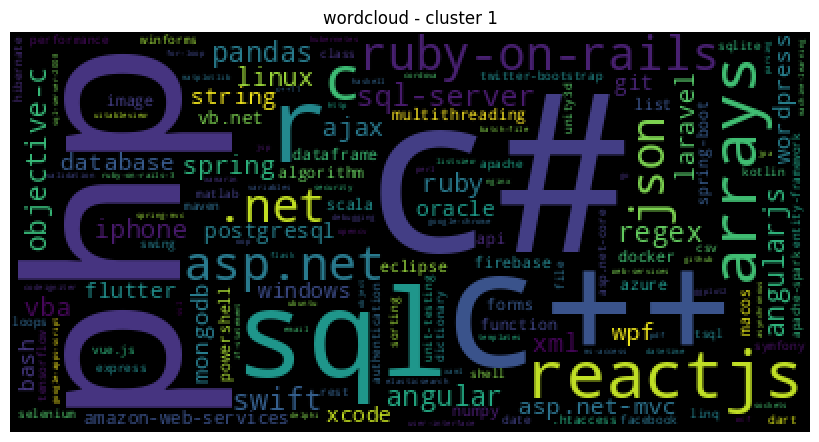

<Figure size 640x480 with 0 Axes>

In [17]:
#check word freq for cluster==1 => PHP
cluster1 = df[df.cluster==1]
wc_cluster1 = cluster1.words.value_counts()
# plot the WordCloud image
plot_cluster1 = wc.WordCloud().fit_words(wc_cluster1)
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(plot_cluster1)
plt.axis("off")
plt.title('wordcloud - cluster 1')
plt.tight_layout(pad = 0)
plt.show()
plt.savefig('wordcloud - cluster 1.png', dpi=100)


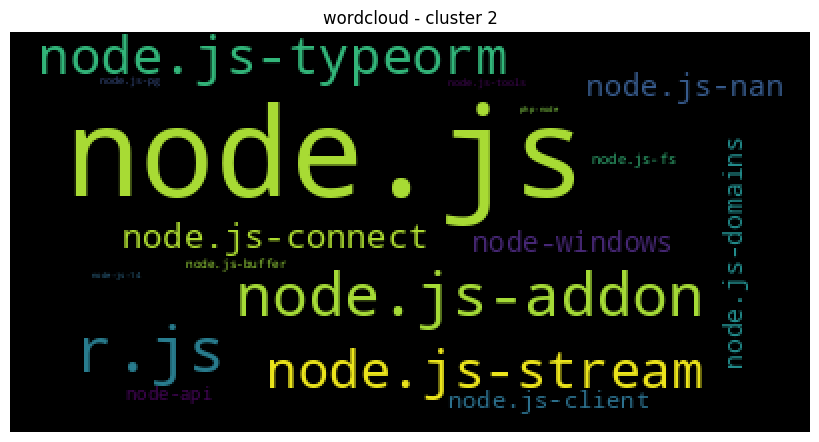

In [18]:
#check word freq for cluster==2
cluster2 = df[df.cluster==2]
wc_cluster2 = cluster2.words.value_counts()
# plot the WordCloud image
#plot_cluster2 = wc.WordCloud(background_color=None, mode="RGBA").fit_words(wc_cluster2)
plot_cluster2 = wc.WordCloud().fit_words(wc_cluster2)
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(plot_cluster2)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.title('wordcloud - cluster 2')
plt.show()

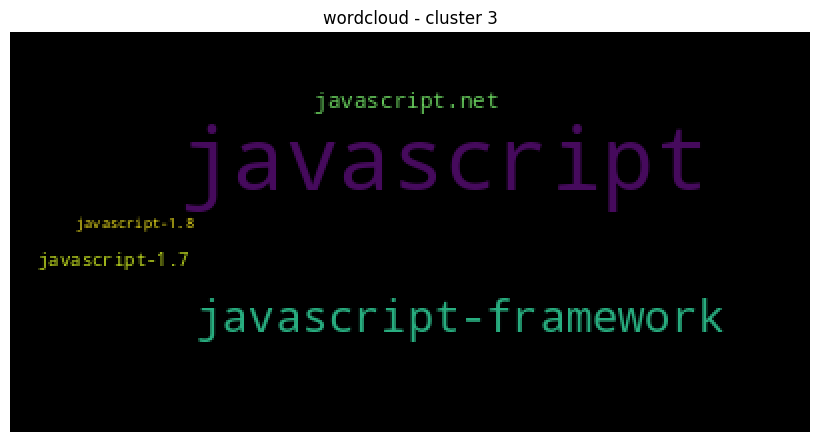

In [19]:
#check word freq for cluster==3
cluster3 = df[df.cluster==3]
wc_cluster3 = cluster3.words.value_counts()
# plot the WordCloud image
plot_cluster3 = wc.WordCloud().fit_words(wc_cluster3)
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(plot_cluster3)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.title('wordcloud - cluster 3')
plt.show()

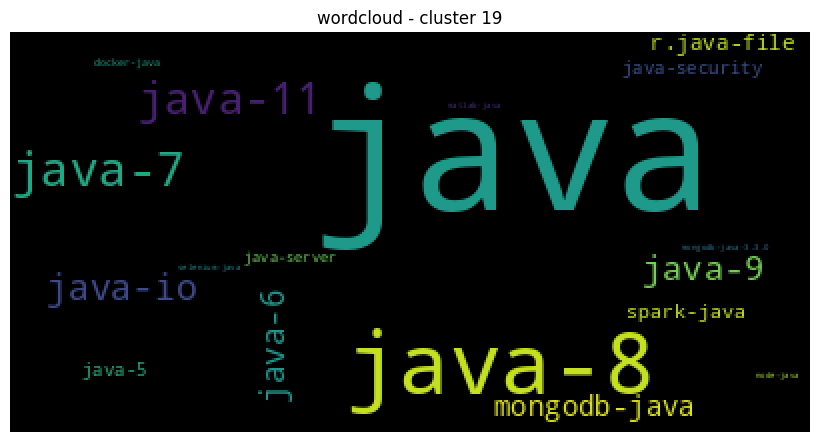

In [20]:
#check word freq for cluster==19
cluster19 = df[df.cluster==19]
wc_cluster19 = cluster19.words.value_counts()
# plot the WordCloud image
plot_cluster19 = wc.WordCloud().fit_words(wc_cluster19)
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(plot_cluster19)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.title('wordcloud - cluster 19')
plt.show()

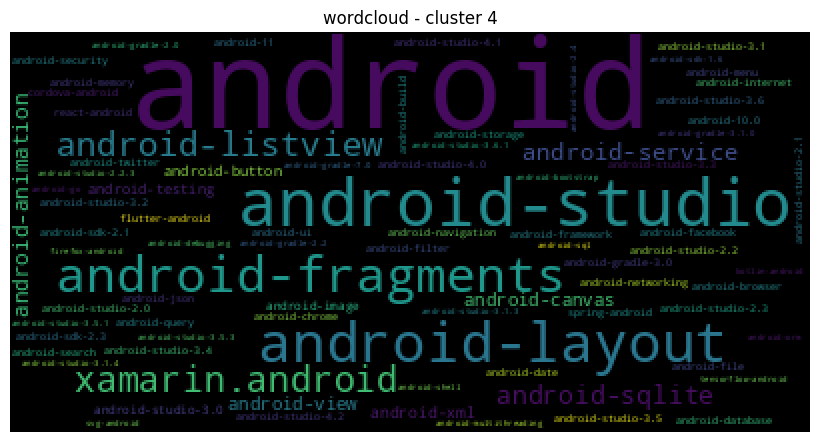

In [21]:
#check word freq for cluster==4
cluster4 = df[df.cluster==4]
wc_cluster4 = cluster4.words.value_counts()
# plot the WordCloud image
plot_cluster4 = wc.WordCloud().fit_words(wc_cluster4)
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(plot_cluster4)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.title('wordcloud - cluster 4')
plt.show()

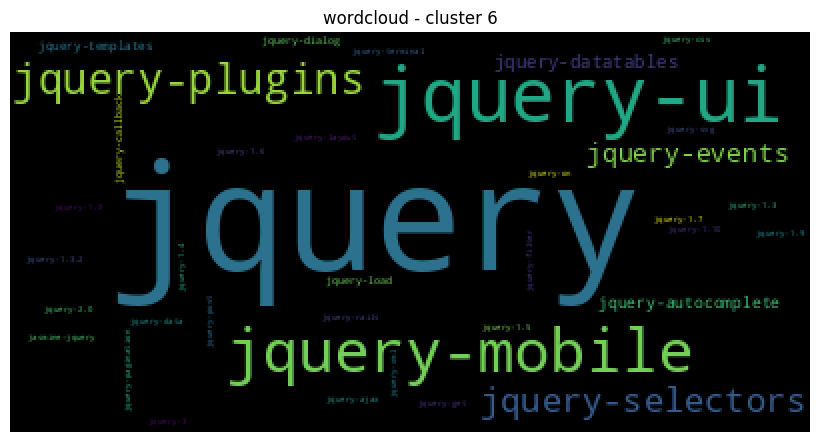

In [22]:
#check word freq for cluster==6
cluster6 = df[df.cluster==6]
wc_cluster6 = cluster6.words.value_counts()
# plot the WordCloud image
plot_cluster6 = wc.WordCloud().fit_words(wc_cluster6)
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(plot_cluster6)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.title('wordcloud - cluster 6')
plt.show()

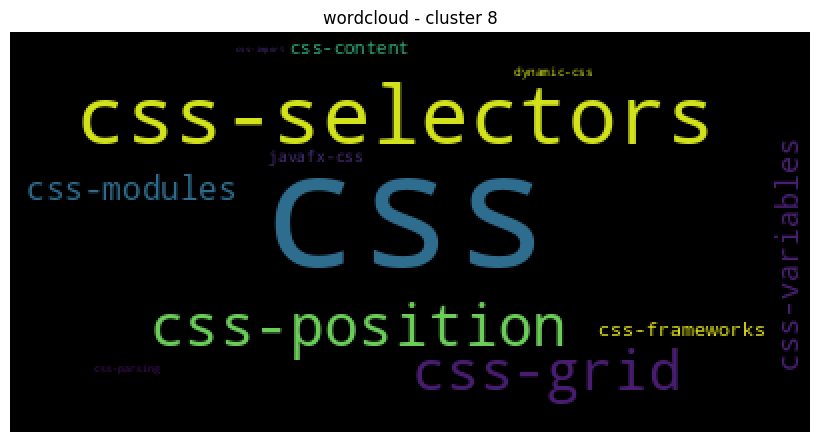

In [23]:
#check word freq for cluster==8
cluster8 = df[df.cluster==8]
wc_cluster8 = cluster8.words.value_counts()
# plot the WordCloud image
plot_cluster8 = wc.WordCloud().fit_words(wc_cluster8)
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(plot_cluster8)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.title('wordcloud - cluster 8')
plt.show()

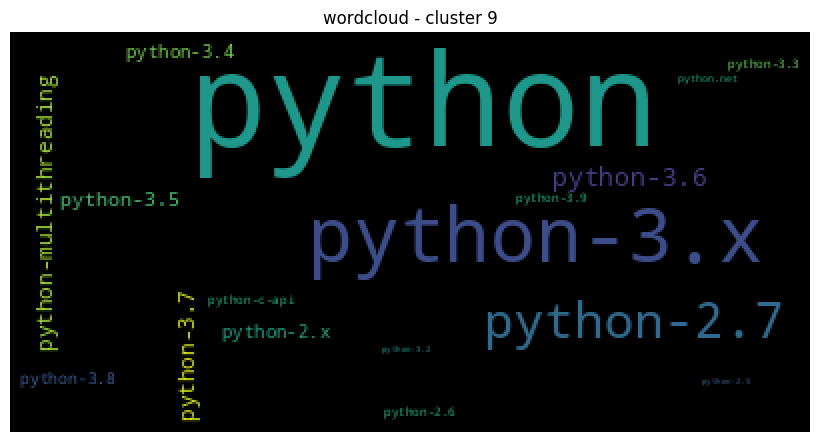

In [24]:
#check word freq for cluster==9
cluster9 = df[df.cluster==9]
wc_cluster9 = cluster9.words.value_counts()
# plot the WordCloud image
plot_cluster9 = wc.WordCloud().fit_words(wc_cluster9)
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(plot_cluster9)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.title('wordcloud - cluster 9')
plt.show()

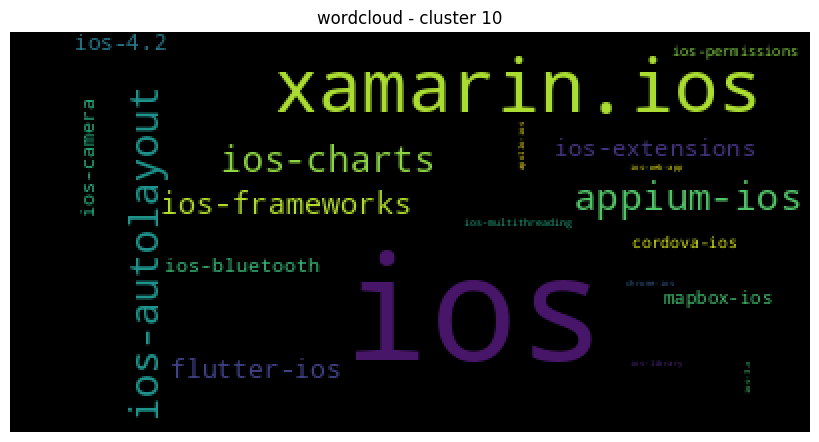

In [25]:
#check word freq for cluster==10
cluster10 = df[df.cluster==10]
wc_cluster10 = cluster10.words.value_counts()
# plot the WordCloud image
plot_cluster10 = wc.WordCloud().fit_words(wc_cluster10)
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(plot_cluster10)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.title('wordcloud - cluster 10')
plt.show()

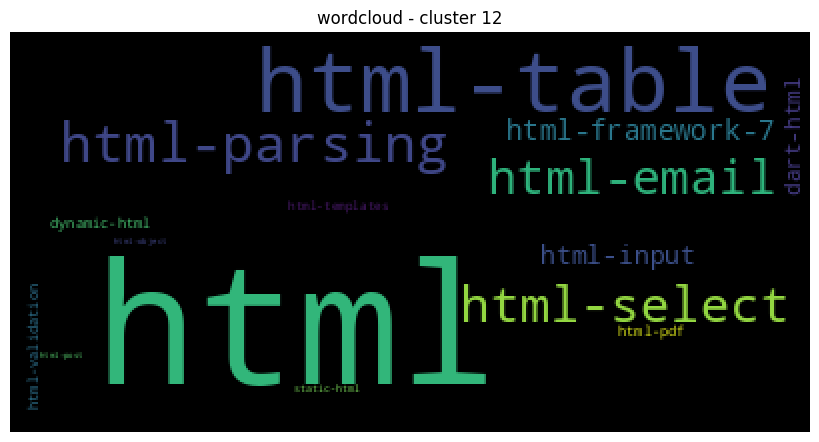

In [26]:
#check word freq for cluster==12
cluster12 = df[df.cluster==12]
wc_cluster12 = cluster12.words.value_counts()
# plot the WordCloud image
plot_cluster12 = wc.WordCloud().fit_words(wc_cluster12)
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(plot_cluster12)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.title('wordcloud - cluster 12')
plt.show()

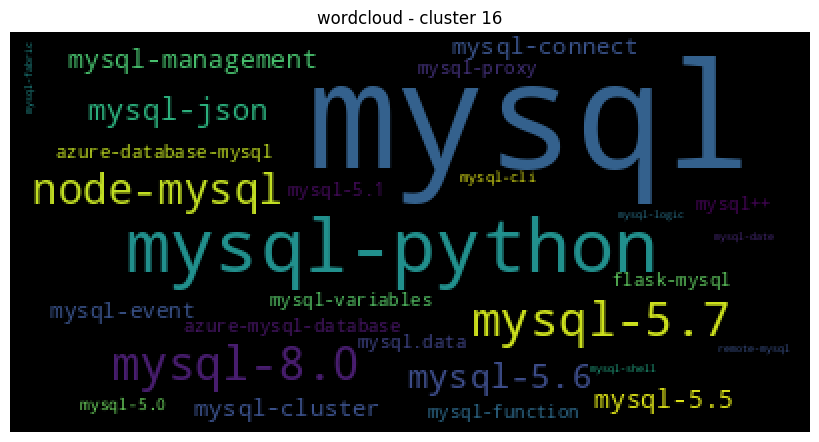

In [27]:
#check word freq for cluster==16
cluster16 = df[df.cluster==16]
wc_cluster16 = cluster16.words.value_counts()
# plot the WordCloud image
plot_cluster16 = wc.WordCloud().fit_words(wc_cluster16)
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(plot_cluster16)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.title('wordcloud - cluster 16')
plt.show()

# Print wordlist for top cluster

In [28]:
wc_cluster1.to_csv('wc_cluster1.csv', header = True)

In [29]:
wc_cluster3.to_csv('wc_cluster3.csv')

In [30]:
wc_cluster9.to_csv('wc_cluster9.csv')

In [31]:
wc_cluster19.to_csv('wc_cluster19.csv')

In [32]:
wc_cluster2.to_csv('wc_cluster2.csv')

In [33]:
wc_cluster4.to_csv('wc_cluster4.csv')

In [35]:
# wc_cluster5.to_csv('wc_cluster5.csv')

In [36]:
wc_cluster12.to_csv('wc_cluster12.csv')

In [40]:
# wc_cluster15.to_csv('wc_cluster15.csv')

In [41]:
wc_cluster10.to_csv('wc_cluster10.csv')

In [42]:
wc_cluster6.to_csv('wc_cluster6.csv')

In [43]:
wc_cluster8.to_csv('wc_cluster8.csv')

# Export result

In [44]:
# Extract clusters corresponding to all tags
clusters = model.labels_.tolist()

In [45]:
len(clusters)

69111608

In [46]:
df.head()

,words,cluster
0,ax,1
1,ax,1
2,nonlinear-functions,1
3,nonlinear-functions,1
4,nonlinear-functions,1


In [47]:
# from collections import Counter
# d = Counter(df.cluster)
# df_cluster = pd.DataFrame.from_dict(d, orient='index').reset_index()

In [48]:
df_cluster = df.cluster.value_counts().to_frame().reset_index()

In [49]:
df_cluster

,index,cluster
0,1,53705389
1,9,2526797
2,3,2454741
3,19,1914377
4,4,1676068
5,12,1197350
6,6,1128253
7,8,807276
8,10,699455
9,16,663312


In [50]:
df_cluster.to_csv('df_cluster_20.csv', header = True)

In [51]:
cluster_count = df_cluster.rename(columns={"index": "cluster", "cluster": "count"}).sort_values(by=['count'], ascending = False)

In [52]:
cluster_count.head()

,cluster,count
0,1,53705389
1,9,2526797
2,3,2454741
3,19,1914377
4,4,1676068


In [54]:
# df.to_parquet('tags_cluster_20.parquet')